In [1]:
import numpy as np
import pandas as pd
import random

from sklearn import datasets
from sklearn.metrics import mean_absolute_percentage_error

from easy_geppy import EasyGeppy

random.seed(1)
np.random.seed(1)

In [2]:
dataset = datasets.fetch_california_housing(as_frame=1)
dataset

{'data':        MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
 0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
 1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
 2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
 3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
 4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
 ...       ...       ...       ...        ...         ...       ...       ...   
 20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
 20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
 20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
 20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
 20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   
 
        Longitude 

In [3]:
df = dataset.frame
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [4]:
X_train = df.sample(int(len(df)*0.9))
X_train

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
4712,3.2500,39.0,4.503205,1.073718,1109.0,1.777244,34.06,-118.36,3.550
2151,1.9784,37.0,4.988584,1.038813,1143.0,2.609589,36.78,-119.78,0.707
15927,4.0132,46.0,4.480296,1.012315,1534.0,3.778325,37.73,-122.42,2.294
82,1.5208,52.0,3.908046,1.114943,200.0,2.298851,37.81,-122.28,1.125
8161,5.1795,37.0,5.406360,1.024735,711.0,2.512367,33.82,-118.13,2.254
...,...,...,...,...,...,...,...,...,...
10225,3.3594,32.0,4.969298,0.947368,693.0,3.039474,33.87,-117.89,2.021
7559,2.7813,33.0,4.799331,1.076923,1298.0,4.341137,33.90,-118.20,1.051
11080,4.3661,35.0,5.797665,0.976654,629.0,2.447471,33.80,-117.84,2.221
9787,2.4881,29.0,6.101911,1.229299,1019.0,3.245223,36.06,-120.79,0.875


In [5]:
X_test = df[~df.index.isin(X_train.index)]
X_test

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
15,2.1250,50.0,4.242424,1.071970,697.0,2.640152,37.85,-122.26,1.400
18,1.9911,50.0,5.343675,1.085919,990.0,2.362768,37.84,-122.26,1.587
20,1.3578,40.0,4.524096,1.108434,409.0,2.463855,37.85,-122.27,1.475
27,1.8080,52.0,4.780856,1.060453,1102.0,2.775819,37.85,-122.28,1.055
29,1.6875,52.0,4.703226,1.032258,395.0,2.548387,37.84,-122.28,1.320
...,...,...,...,...,...,...,...,...,...
20589,1.6652,48.0,4.767380,1.066845,938.0,2.508021,39.15,-121.59,0.589
20609,2.3011,18.0,4.856823,1.073826,1527.0,3.416107,39.11,-121.56,0.575
20622,2.4167,20.0,4.808917,0.936306,457.0,2.910828,39.00,-121.44,0.670
20625,4.1250,37.0,7.285714,1.214286,29.0,2.071429,39.12,-121.52,0.720


In [6]:
x_inputs = list(X_train.drop('MedHouseVal',axis=1).columns)
x_inputs

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [7]:
egp = EasyGeppy(X_train, x_columns=x_inputs, y_column='MedHouseVal')

egp.default_initialization()

In [8]:
egp.metric

<function easy_geppy.easy_geppy.get_default_metric.<locals>.SSE(Y_actual, Y_Predicted)>

In [9]:
egp.launch_evolution(n_pop=3000,n_gen=300)

gen	nevals	size	avg        	std        	min    	max        
0  	100   	100 	3.03161e+30	3.01641e+31	40282.4	3.03161e+32
1  	99    	100 	2.60415e+20	2.55312e+21	40282.4	2.56609e+22
2  	99    	100 	1.23983e+22	1.23362e+23	29014  	1.23983e+24
3  	99    	100 	2.09765e+22	2.08711e+23	29014  	2.09763e+24
4  	99    	100 	1.35582e+25	9.50385e+25	29014  	7.132e+26  
5  	99    	100 	8.22927e+32	8.18802e+33	29014  	8.22927e+34
6  	99    	100 	1.24093e+18	1.23443e+19	29014  	1.24065e+20
7  	99    	100 	3.81585e+17	3.78441e+18	29014  	3.80359e+19
8  	99    	100 	1.84068e+21	1.83145e+22	24778  	1.84068e+23
9  	99    	100 	2.72737e+18	2.65012e+19	24778  	2.66373e+20
10 	99    	100 	1.86871e+28	1.85934e+29	24778  	1.86871e+30
11 	99    	100 	5.6372e+24 	5.60882e+25	24778  	5.63708e+26
12 	99    	100 	1.48331e+21	1.47587e+22	24762.3	1.48331e+23
13 	99    	100 	5.59333e+23	5.56529e+24	24762.3	5.59333e+25
14 	99    	100 	1.37252e+14	8.49591e+14	19037.3	6.74111e+15
15 	99    	100 	6.74366e+16	6.70984e+17	

In [10]:

# Get resulting function for making predictions
best_func = egp.get_best_solution_as_function()

# Make predictions
preds = best_func(X_test).values
preds

array([1.47332391, 1.34485772, 1.02633632, ..., 1.34244449, 2.55148664,
       1.28679336])

In [11]:
X_test['y_predicted'] = preds#list(preds)
X_test

/tmp/ipykernel_24299/3974805221.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['y_predicted'] = preds#list(preds)


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal,y_predicted
15,2.1250,50.0,4.242424,1.071970,697.0,2.640152,37.85,-122.26,1.400,1.473324
18,1.9911,50.0,5.343675,1.085919,990.0,2.362768,37.84,-122.26,1.587,1.344858
20,1.3578,40.0,4.524096,1.108434,409.0,2.463855,37.85,-122.27,1.475,1.026336
27,1.8080,52.0,4.780856,1.060453,1102.0,2.775819,37.85,-122.28,1.055,1.183853
29,1.6875,52.0,4.703226,1.032258,395.0,2.548387,37.84,-122.28,1.320,1.177168
...,...,...,...,...,...,...,...,...,...,...
20589,1.6652,48.0,4.767380,1.066845,938.0,2.508021,39.15,-121.59,0.589,1.169298
20609,2.3011,18.0,4.856823,1.073826,1527.0,3.416107,39.11,-121.56,0.575,1.170778
20622,2.4167,20.0,4.808917,0.936306,457.0,2.910828,39.00,-121.44,0.670,1.342444
20625,4.1250,37.0,7.285714,1.214286,29.0,2.071429,39.12,-121.52,0.720,2.551487


In [12]:
# Get symbolic representation of the resulting function
egp.get_best_solution_simplified()

(AveOccup*HouseAge*(AveBedrms + MedInc) + AveRooms*MedInc*(AveRooms + HouseAge + MedInc))/(AveOccup*AveRooms*(AveRooms + HouseAge + MedInc))

In [13]:
mean_absolute_percentage_error(X_test['MedHouseVal'],X_test['y_predicted'])

0.3289879153130675

In [14]:
egp.metric(X_test['MedHouseVal'],X_test['y_predicted'])

1119.7869135587387

In [15]:
import geppy as gep

 # we want use symbol labels instead of words in the tree graph
rename_labels = {'add': '+', 'sub': '-', 'mul': '*', 'protected_div': '/'}  
gep.export_expression_tree(egp.best_individual, rename_labels, 'data/chd-numerical_expression_tree.png')



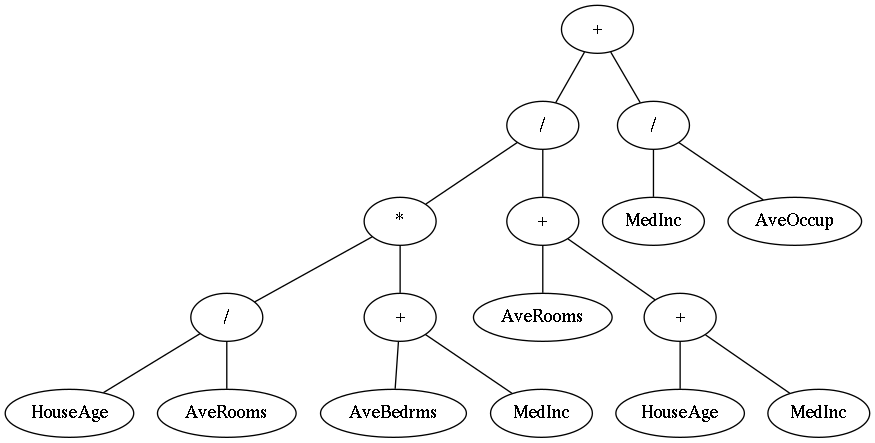

In [16]:
# show the above image here for convenience
from IPython.display import Image
Image(filename='data/chd-numerical_expression_tree.png') 

<AxesSubplot:ylabel='Frequency'>

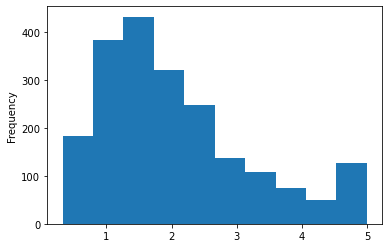

In [17]:
X_test['MedHouseVal'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

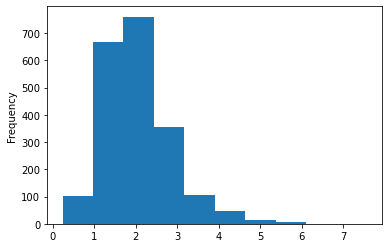

In [18]:
X_test['y_predicted'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

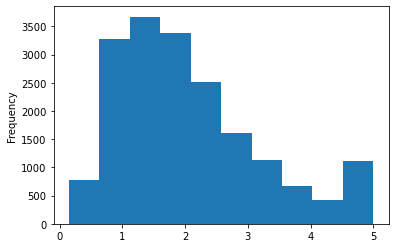

In [19]:
X_train['MedHouseVal'].plot.hist()